![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# FINAL PROJECT

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/Final_project/DSF_FINAL_PROJECT.ipynb)

# Regarding the final project for the class

The final project for the class will need to draw from everything you have covered in class, at least everything relevant for your final project. For that you will need to choose a topic. You will be using **the image and text** datasets that we have seen on our sessions. 

It doesn't need to be a super revolutionary idea, but at least have in mind the issue of reducing the time between information and action. And you will need to send it to me. 

The project will need to contain the following steps:

1. Ingesting, exploring and cleaning data for your project
2. Choosing/testing of algorithm approach
3. Visualizing the results
4. Packaging the project into a product

You will be using code from class to support you on the second, third and forth parts of the project. 

I am not looking for excellence, and I do not mind that you copy/paste code, but always try to understand why. 

In [1]:
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [2]:
!pip3 install flair

In [3]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [4]:
import spacy
import nltk
from spacy.pipeline import SentenceSegmenter
import pandas as pd 
import numpy as np


nlp_md = spacy.load('en_core_web_lg')

In [5]:
book1 = open('/content/Beyond good and Evil.txt', 'r').read()

In [6]:
book1

'\ufeffCHAPTER I. PREJUDICES OF PHILOSOPHERS\n\n\n1. The Will to Truth, which is to tempt us to many a hazardous\nenterprise, the famous Truthfulness of which all philosophers have\nhitherto spoken with respect, what questions has this Will to Truth not\nlaid before us! What strange, perplexing, questionable questions! It is\nalready a long story; yet it seems as if it were hardly commenced. Is\nit any wonder if we at last grow distrustful, lose patience, and turn\nimpatiently away? That this Sphinx teaches us at last to ask questions\nourselves? WHO is it really that puts questions to us here? WHAT really\nis this "Will to Truth" in us? In fact we made a long halt at the\nquestion as to the origin of this Will--until at last we came to an\nabsolute standstill before a yet more fundamental question. We inquired\nabout the VALUE of this Will. Granted that we want the truth: WHY NOT\nRATHER untruth? And uncertainty? Even ignorance? The problem of the\nvalue of truth presented itself befo

In [7]:
book1 = book1.replace("\n",'')


In [235]:
book = book.replace("\n",'')
sentences  = book.split('.')

df_tokens = pd.DataFrame((np.zeros((100,1550))))
for i , t in enumerate(sentences):
   doc = nlp_md(t)
   df_tokens[i].update(doc)


In [132]:
from flair.models import TextClassifier
from flair.data import Sentence
tagger = TextClassifier.load('sentiment')


2020-12-08 14:35:51,791 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt


In [10]:
df_sentement = pd.DataFrame((np.zeros((100,1550))))
for i , t in enumerate(sentences):
  s = Sentence(t)
  tagger.predict(s)
  df_sentement[i].update(s.labels)
df_sentement

2020-12-08 13:53:37,509 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:53:37,511 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:53:38,991 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:53:38,994 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:53:41,789 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:53:41,791 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:53:46,559 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:53:46,561 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:54:01,667 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 13:54:01,670 Warning: An empty Sentence was 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,POSITIVE (0.9981),NEGATIVE (0.9861),POSITIVE (0.5081),NEGATIVE (0.9797),POSITIVE (0.578),NEGATIVE (0.9662),NEGATIVE (0.9867),POSITIVE (0.92),NEGATIVE (0.9768),POSITIVE (0.7878),POSITIVE (0.9491),NEGATIVE (0.9788),NEGATIVE (0.9992),NEGATIVE (0.809),NEGATIVE (0.8847),NEGATIVE (0.9504),POSITIVE (0.7296),POSITIVE (0.9152),POSITIVE (0.8253),NEGATIVE (0.9789),POSITIVE (0.8385),POSITIVE (0.8799),POSITIVE (0.9121),NEGATIVE (0.9746),POSITIVE (0.7262),NEGATIVE (0.9101),POSITIVE (0.9841),NEGATIVE (0.9194),NEGATIVE (0.9974),NEGATIVE (0.9785),POSITIVE (0.9996),NEGATIVE (0.9075),POSITIVE (0.7901),POSITIVE (0.9518),NEGATIVE (0.9921),POSITIVE (0.6408),NEGATIVE (0.9781),NEGATIVE (0.9994),POSITIVE (0.9977),POSITIVE (0.9314),...,NEGATIVE (0.9974),NEGATIVE (0.5915),NEGATIVE (0.9044),POSITIVE (0.8699),POSITIVE (0.8881),POSITIVE (0.9982),POSITIVE (0.9611),NEGATIVE (0.9954),POSITIVE (0.9985),POSITIVE (0.9789),POSITIVE (0.8494),NEGATIVE (0.9637),POSITIVE (0.6604),NEGATIVE (0.9644),NEGATIVE (0.9986),POSITIVE (0.9991),POSITIVE (0.9987),NEGATIVE (0.5036),POSITIVE (0.9203),POSITIVE (0.994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_ent = pd.DataFrame((np.zeros((100,1550))))
for i , t in enumerate(sentences):
  doc = nlp_md(t)
  df_ent[i].update(doc.ents)
df_ent

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,0.0,0.0,0.0,(Sphinx),0.0,(NOTRATHER),(asif),(2),(truthout),0.0,0.0,0.0,(whetherantitheses),0.0,0.0,0.0,0.0,(3),0.0,(Aslittle),(US),0.0,(4),0.0,(Thequestion),0.0,(5),"(half, -, distrustfullyand)",(hadbeen),(theirprejudices),(Tartuffery),(bymeans),0.0,0.0,(one),0.0,0.0,(politics;it),0.0,(7),...,0.0,0.0,0.0,(Ye),0.0,(one),0.0,(Strongest),(9),(Unto),(10),(Love),0.0,(night),(Pinings),(Midday),(14),(midday),0.0,(bourne),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,"(Will, to, Truth)",0.0,(Oedipus),(firstto),0,(genesis),0.0,0.0,0.0,(secondly),0.0,0.0,0.0,0.0,0,0.0,(hisinstincts),0,0.0,0,0.0,(bea),0.0,0,"(are,--but)",(foolisher),(theconscience),(Kant),(Spinoza),0.0,0.0,0,0.0,0.0,(littlemachine),0.0,0,...,0.0,0.0,0.0,(Ye),0.0,0,0.0,(sent--),0,0,0,(thereon?)--),0.0,(12),(13),(second),0,(two),0.0,(Zarathustra),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0.0,0,(riskin),0,(dreamsof),0.0,0.0,0.0,(theirseal),0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,(andvirtuous),(witharguments),0,(equallystiff),(Pallas),0.0,0.0,0,0.0,0.0,(notCHARACTERISED),0.0,0,...,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,(summer),0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0.0,0,0,0,(highestvalue),0.0,0.0,0.0,(provisionalperspectives),0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,(Unrestful),0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0,0.0,0,0,0,(thistransitory),0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,(friends!--am),0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,...,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
l = []
for i , x in enumerate(df_sentement.iloc[0,:]):
  try:
    if str(x.value) == 'NEGATIVE':
      p = x.score * (-1)
    else:
      p = x.score
    l.append(p)
  except:
    pass
l = pd.DataFrame(l)
l['Moving'] = l[0].rolling(20).mean()

In [176]:
l

,0,Moving
0,0.998114,NaN
1,-0.986062,NaN
2,0.508079,NaN
3,-0.979693,NaN
4,0.577998,NaN
...,...,...
89,0.918581,0.298811
90,0.990071,0.302827
91,0.999415,0.317124
92,0.968675,0.415449


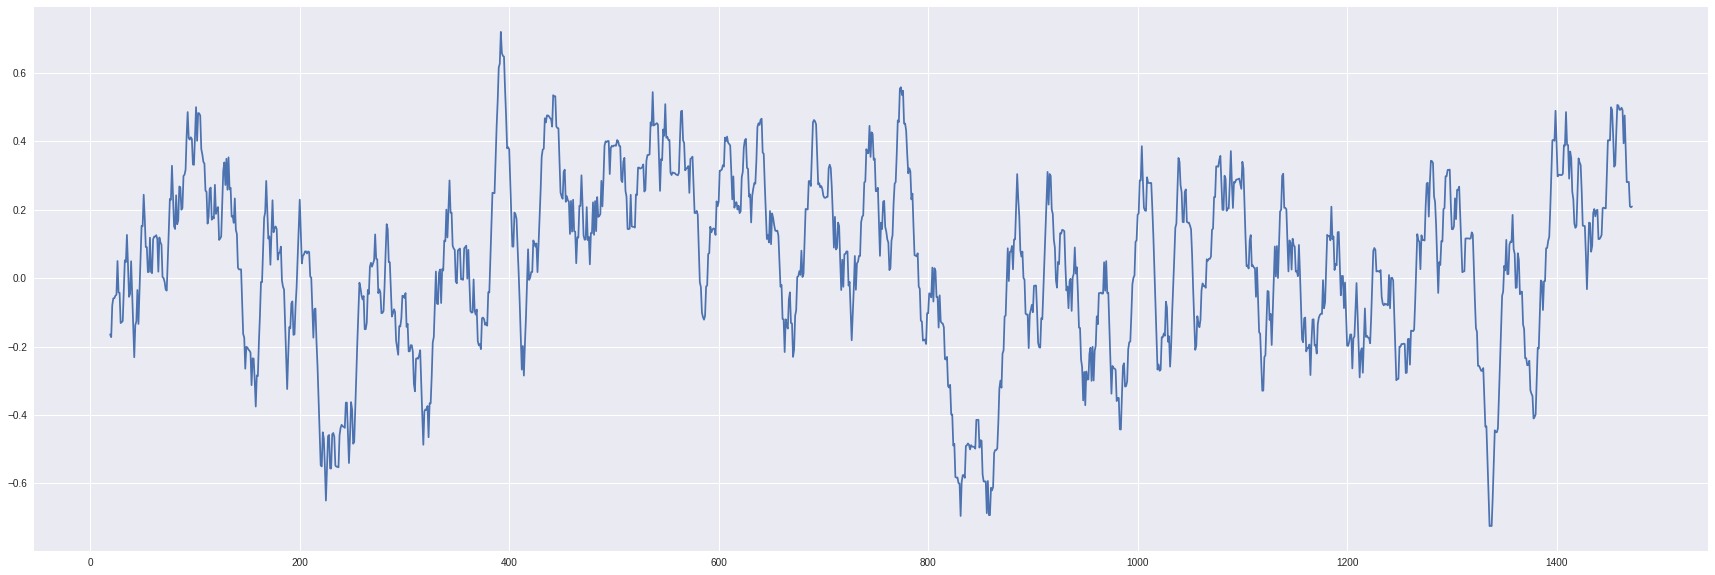

In [146]:
import matplotlib.pyplot as plt


plt.figure(figsize = (30,10))
plt.style.use("seaborn")
plt.plot(l['Moving'])

In [123]:
d_ents = df_ent.values.flatten()
df_ents = pd.DataFrame(d_ents)

df_ents['index'] = (df_ents.index / 100)
df_ents['index'] = df_ents['index'].apply(np.floor)
indexNames = df_ents[~(df_ents[0] != 0)].index 
df_ents.drop(indexNames , inplace=True)

df_ents['name'] = 0
df_ents['type'] = 0

In [124]:
for i , item in enumerate(df_ents.iloc[:,0]):
  df_ents['name'].iloc[i] = item.text
  df_ents['type'].iloc[i]  = item.label_

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [125]:
indexNames = df_ents[~(df_ents['type'] != 'CARDINAL')].index 
df_ents.drop(indexNames , inplace=True)

<BarContainer object of 10 artists>

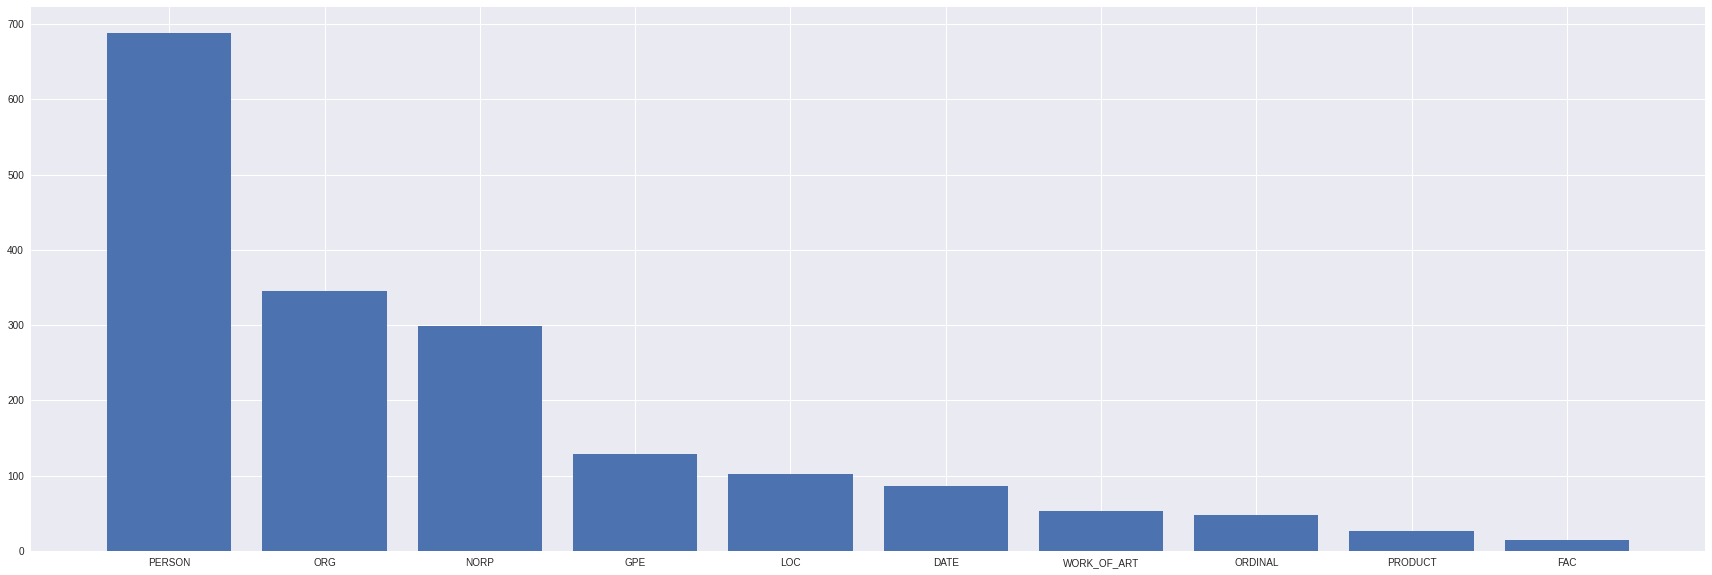

In [126]:
bar = df_ents['type'].value_counts().head(10)
plt.figure(figsize= (30,10))
plt.bar(bar.index , bar)

<BarContainer object of 10 artists>

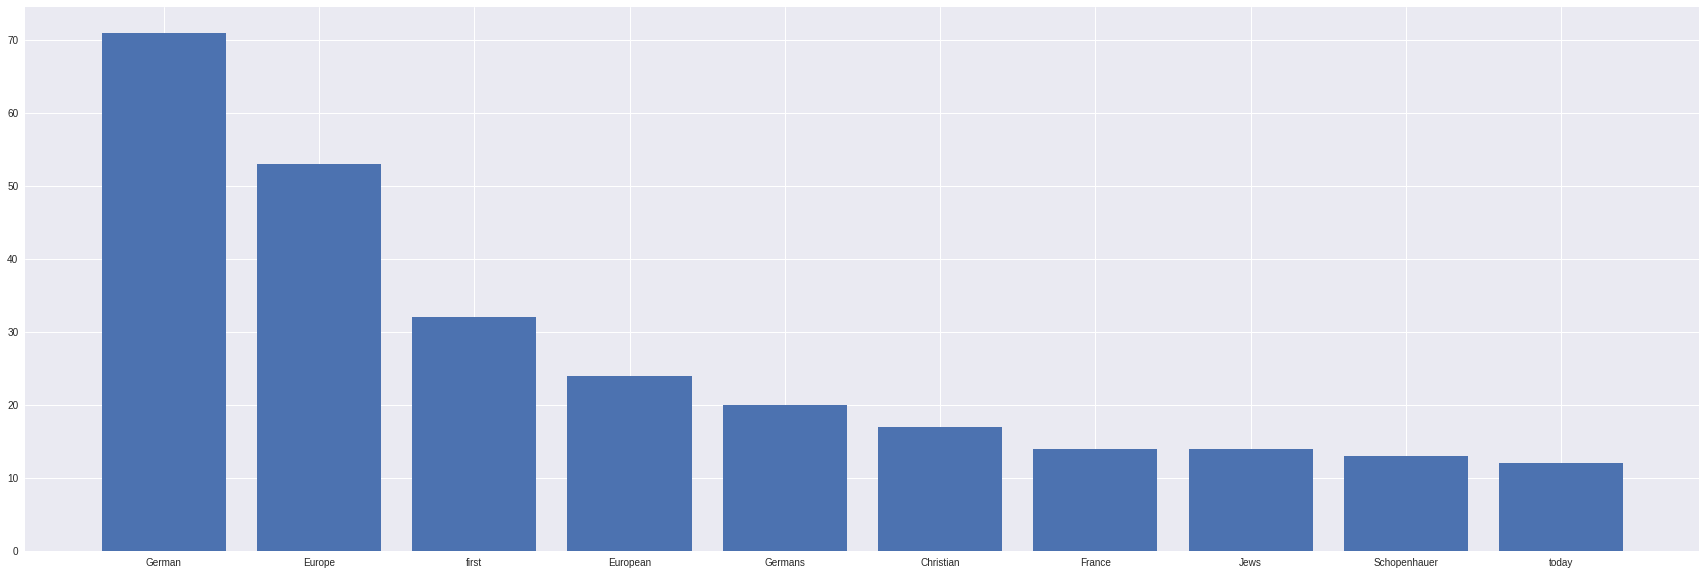

In [127]:
bar = df_ents['name'].value_counts().head(10)
plt.figure(figsize= (30,10))
plt.bar(bar.index , bar)

In [128]:
v = df_ents['name'].value_counts().head(5).index

In [129]:
from collections import defaultdict
indexes = defaultdict(list)
for i , ent in enumerate(df_ents.iloc[:,0]):
        indexes[ent.text].append(df_ents['index'].iloc[i])
  

IndexError: ignored

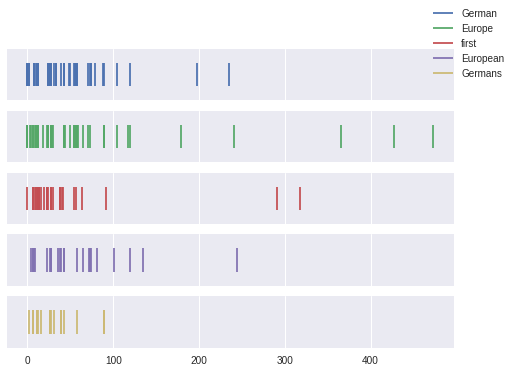

In [130]:
  fig, axes = plt.subplots(len(v), sharex=True)
for index, name in enumerate(v):
    axes[index].eventplot(indexes[name], label=name, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)
fig.legend()
plt.plot(l['Moving'])

In [ ]:
plt.plot(l['Moving'])

In [152]:
pd.Series(sentences)

0                                              ﻿CHAPTER I
1                             PREJUDICES OF PHILOSOPHERS1
2        The Will to Truth, which is to tempt us to ma...
3        Isit any wonder if we at last grow distrustfu...
4                 We inquiredabout the VALUE of this Will
                              ...                        
1526     Come! Come! The time is right!               ...
1527         This song is done,--the sweet sad cry of ...
1528                                                   15
1529         We keep our Feast of Feasts, sure of our ...
1530                                                     
Length: 1531, dtype: object

Load Books

In [234]:
book = open('/content/Beyond good and Evil.txt', 'r').read()

Run Sentimental Analysis 

In [241]:
#split book into sentences 
book = book.replace("\n",'')
sentences  = book.split('.')


# Run Sentiment analysis on all sentences
from flair.models import TextClassifier
from flair.data import Sentence
tagger = TextClassifier.load('sentiment')
df_sentement = pd.DataFrame((np.zeros((10,1550))))
for i , t in enumerate(sentences):
  s = Sentence(t)
  tagger.predict(s)
  df_sentement[i].update(s.labels)
df_sentement

2020-12-08 15:40:45,470 loading file /root/.flair/models/sentiment-en-mix-distillbert_3.1.pt
2020-12-08 15:40:53,102 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:40:53,104 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:40:54,499 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:40:54,501 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:40:56,921 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:40:56,923 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:41:01,465 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:41:01,467 Warning: An empty Sentence was created! Are there empty strings in your dataset?
2020-12-08 15:41:17,155 Warning: An empty Sentence was created! Are

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
0,POSITIVE (0.9981),NEGATIVE (0.9861),POSITIVE (0.5081),NEGATIVE (0.9797),POSITIVE (0.578),NEGATIVE (0.9662),NEGATIVE (0.9867),POSITIVE (0.92),NEGATIVE (0.9768),POSITIVE (0.7878),POSITIVE (0.9491),NEGATIVE (0.9788),NEGATIVE (0.9992),NEGATIVE (0.809),NEGATIVE (0.8847),NEGATIVE (0.9504),POSITIVE (0.7296),POSITIVE (0.9152),POSITIVE (0.8253),NEGATIVE (0.9789),POSITIVE (0.8385),POSITIVE (0.8799),POSITIVE (0.9121),NEGATIVE (0.9746),POSITIVE (0.7262),NEGATIVE (0.9101),POSITIVE (0.9841),NEGATIVE (0.9194),NEGATIVE (0.9974),NEGATIVE (0.9785),POSITIVE (0.9996),NEGATIVE (0.9075),POSITIVE (0.7901),POSITIVE (0.9518),NEGATIVE (0.9921),POSITIVE (0.6408),NEGATIVE (0.9781),NEGATIVE (0.9994),POSITIVE (0.9977),POSITIVE (0.9314),...,NEGATIVE (0.9974),NEGATIVE (0.5915),NEGATIVE (0.9044),POSITIVE (0.8699),POSITIVE (0.8881),POSITIVE (0.9982),POSITIVE (0.9611),NEGATIVE (0.9954),POSITIVE (0.9985),POSITIVE (0.9789),POSITIVE (0.8494),NEGATIVE (0.9637),POSITIVE (0.6604),NEGATIVE (0.9644),NEGATIVE (0.9986),POSITIVE (0.9991),POSITIVE (0.9987),NEGATIVE (0.5036),POSITIVE (0.9203),POSITIVE (0.994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Draw 


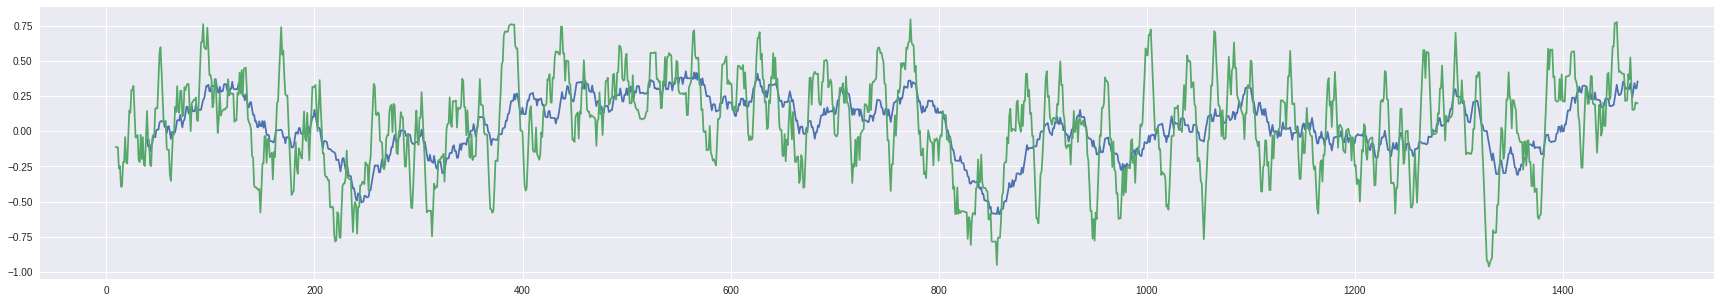

In [249]:
l = []
for i , x in enumerate(df_sentement.iloc[0,:]):
  try:
    if str(x.value) == 'NEGATIVE':
      p = x.score * (-1)
    else:
      p = x.score
    l.append(p)
  except:
    pass
l = pd.DataFrame(l)
l['Major'] = l[0].rolling(40).mean()
l['Minor'] = l[0].rolling(10).mean()

import matplotlib.pyplot as plt
plt.style.use("seaborn")

plt.figure(figsize = (30,5))
plt.plot(l['Major'])
plt.plot(l['Minor'])

,0,Moving,Major,Minor,detailed
0,0.998114,NaN,NaN,NaN,NaN
1,-0.986062,NaN,NaN,NaN,NaN
2,0.508079,NaN,NaN,NaN,NaN
3,-0.979693,NaN,NaN,NaN,NaN
4,0.577998,NaN,NaN,0.023687,0.023687
...,...,...,...,...,...
89,0.918581,0.298811,0.298811,0.626961,0.626961
90,0.990071,0.302827,0.302827,0.626391,0.626391
91,0.999415,0.317124,0.317124,0.634639,0.634639
92,0.968675,0.415449,0.415449,0.964639,0.964639
